In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
  .appName('2.1. Google Cloud Storage (CSV) & Spark DataFrames') \
  .getOrCreate()

In [2]:
PartDRawData = "shreneel-bigdata1/Medicare_Part_D_Prescribers_by_Provider_and_Drug_Dataset_2016.csv"


In [3]:

from google.cloud import storage

gcs_client = storage.Client()
bucket = gcs_client.bucket('shreneel-bigdata1')

list(bucket.list_blobs(prefix='Medicare_Part_D_Prescribers_by_Provider_and_Drug_Dataset_2016.csv'))

[<Blob: shreneel-bigdata1, Medicare_Part_D_Prescribers_by_Provider_and_Drug_Dataset_2016.csv, 1683164667126860>]

In [4]:
!hdfs dfs -ls 'gs://shreneel-bigdata1/Medicare_Part_D_Prescribers_by_Provider_and_Drug_Dataset_2016.csv'

-rwx------   3 root root 3580761897 2023-05-04 01:44 gs://shreneel-bigdata1/Medicare_Part_D_Prescribers_by_Provider_and_Drug_Dataset_2016.csv


In [5]:
partD_drug_rawdata = spark \
  .read \
  .option ( "inferSchema" , "true" ) \
  .option ( "header" , "true" ) \
  .csv ( "gs://shreneel-bigdata1/Medicare_Part_D_Prescribers_by_Provider_and_Drug_Dataset_2016.csv" )

partD_drug_rawdata.printSchema()

root
 |-- Prscrbr_NPI: integer (nullable = true)
 |-- Prscrbr_Last_Org_Name: string (nullable = true)
 |-- Prscrbr_First_Name: string (nullable = true)
 |-- Prscrbr_City: string (nullable = true)
 |-- Prscrbr_State_Abrvtn: string (nullable = true)
 |-- Prscrbr_State_FIPS: string (nullable = true)
 |-- Prscrbr_Type: string (nullable = true)
 |-- Prscrbr_Type_Src: string (nullable = true)
 |-- Brnd_Name: string (nullable = true)
 |-- Gnrc_Name: string (nullable = true)
 |-- Tot_Clms: integer (nullable = true)
 |-- Tot_30day_Fills: double (nullable = true)
 |-- Tot_Day_Suply: integer (nullable = true)
 |-- Tot_Drug_Cst: double (nullable = true)
 |-- Tot_Benes: integer (nullable = true)
 |-- GE65_Sprsn_Flag: string (nullable = true)
 |-- GE65_Tot_Clms: integer (nullable = true)
 |-- GE65_Tot_30day_Fills: double (nullable = true)
 |-- GE65_Tot_Drug_Cst: double (nullable = true)
 |-- GE65_Tot_Day_Suply: integer (nullable = true)
 |-- GE65_Bene_Sprsn_Flag: string (nullable = true)
 |-- GE65_T

In [6]:
df1=partD_drug_rawdata

In [7]:
df1

DataFrame[Prscrbr_NPI: int, Prscrbr_Last_Org_Name: string, Prscrbr_First_Name: string, Prscrbr_City: string, Prscrbr_State_Abrvtn: string, Prscrbr_State_FIPS: string, Prscrbr_Type: string, Prscrbr_Type_Src: string, Brnd_Name: string, Gnrc_Name: string, Tot_Clms: int, Tot_30day_Fills: double, Tot_Day_Suply: int, Tot_Drug_Cst: double, Tot_Benes: int, GE65_Sprsn_Flag: string, GE65_Tot_Clms: int, GE65_Tot_30day_Fills: double, GE65_Tot_Drug_Cst: double, GE65_Tot_Day_Suply: int, GE65_Bene_Sprsn_Flag: string, GE65_Tot_Benes: int]

In [8]:
num_rows = df1.count()
num_cols = len(df1.columns)
print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

Number of rows:  24964300
Number of columns:  22


In [9]:

from pyspark.sql.functions import col

partD_Drug_pd1 = df1.select(col("Prscrbr_NPI"), col("Prscrbr_City"), col("Prscrbr_State_Abrvtn"), \
                            col("Prscrbr_Last_Org_Name"), col("Prscrbr_First_Name"), \
                            col("Prscrbr_Type"), col("Brnd_Name"), col("Gnrc_Name"), \
                            col("Tot_Drug_Cst"), col("Tot_Clms"), col("Tot_Day_Suply"))

In [10]:
partD_pd1 = partD_Drug_pd1

In [11]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType



# Select the required columns
partD_Drug_df = partD_pd1.select(col('Prscrbr_NPI'), col('Brnd_Name'), col('Tot_Drug_Cst'), col('Tot_Clms'), col('Tot_Day_Suply'), col('Prscrbr_Type'))

# Cast the 'npi' column to 'StringType'
partD_Drug_df = partD_Drug_df.withColumn('Prscrbr_NPI', col('Prscrbr_NPI').cast(StringType()))

# Show the resulting DataFrame
partD_Drug_df.show()


+-----------+--------------------+------------+--------+-------------+-----------------+
|Prscrbr_NPI|           Brnd_Name|Tot_Drug_Cst|Tot_Clms|Tot_Day_Suply|     Prscrbr_Type|
+-----------+--------------------+------------+--------+-------------+-----------------+
| 1003000126|Atorvastatin Calcium|      139.32|      13|          450|Internal Medicine|
| 1003000126|   Ciprofloxacin Hcl|       80.99|      11|           96|Internal Medicine|
| 1003000126| Doxycycline Hyclate|      586.12|      20|          199|Internal Medicine|
| 1003000126|             Eliquis|     6065.02|      17|          510|Internal Medicine|
| 1003000126|          Furosemide|       45.76|      17|          405|Internal Medicine|
| 1003000126|     Hydralazine Hcl|      169.48|      16|          420|Internal Medicine|
| 1003000126|Isosorbide Mononi...|      372.63|      33|         1005|Internal Medicine|
| 1003000126|        Levofloxacin|      222.41|      26|          159|Internal Medicine|
| 1003000126|        

In [12]:
 # Select the required columns
partD_Spec_pd1 = partD_pd1.select(col('Prscrbr_NPI'), col('Prscrbr_Type'))
# Show the resulting DataFrame
partD_Spec_pd1.show()


+-----------+-----------------+
|Prscrbr_NPI|     Prscrbr_Type|
+-----------+-----------------+
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
+-----------+-----------------+
only showing top 20 rows



In [13]:
partD_Drug_df.head()

Row(Prscrbr_NPI='1003000126', Brnd_Name='Atorvastatin Calcium', Tot_Drug_Cst=139.32, Tot_Clms=13, Tot_Day_Suply=450, Prscrbr_Type='Internal Medicine')

In [14]:

# Select the required columns
partD_pd0= partD_pd1.select(col('Prscrbr_NPI'), col('Prscrbr_City'), col('Prscrbr_State_Abrvtn'), \
                               col('Prscrbr_Last_Org_Name'), col('Prscrbr_First_Name'), \
                               col('Prscrbr_Type'))

# Show the resulting DataFrame
partD_pd0.show()


+-----------+------------+--------------------+---------------------+------------------+-----------------+
|Prscrbr_NPI|Prscrbr_City|Prscrbr_State_Abrvtn|Prscrbr_Last_Org_Name|Prscrbr_First_Name|     Prscrbr_Type|
+-----------+------------+--------------------+---------------------+------------------+-----------------+
| 1003000126|  Cumberland|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|  Cumberland|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|  Cumberland|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|  Cumberland|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|  Cumberland|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|  Cumberland|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|  Cumberland|           

In [15]:
partD_catfpd = partD_pd0.drop_duplicates()

In [16]:
partD_catfpd.head()

Row(Prscrbr_NPI=1184760365, Prscrbr_City='Charlotte', Prscrbr_State_Abrvtn='MI', Prscrbr_Last_Org_Name='Knowles', Prscrbr_First_Name='Lisa', Prscrbr_Type='Dentist')

In [17]:

# Define the rename dictionary
rename_dict = {'Prscrbr_First_Name':'first_name', 'Prscrbr_Last_Org_Name':'last_name', \
               'Prscrbr_City':'city', 'Prscrbr_State_Abrvtn':'state', 'Prscrbr_Type':'Speciality'}



# Rename the columns
for old_col, new_col in rename_dict.items():
    partD_catfpd = partD_catfpd.withColumnRenamed(old_col, new_col)

# Show the resulting DataFrame
partD_catfpd.show()

+-----------+------------------+-----+----------+----------+--------------------+
|Prscrbr_NPI|              city|state| last_name|first_name|          Speciality|
+-----------+------------------+-----+----------+----------+--------------------+
| 1154311595|          Harrison|   AR|    Stills|     David|     Family Practice|
| 1154312072|          New York|   NY|   Newland| Jamesetta|  Nurse Practitioner|
| 1154318798|           Cloquet|   MN|   Kosmach|     Lynne|  Nurse Practitioner|
| 1154327534|       Saint Louis|   MO|     Smith|   Kenneth|     General Surgery|
| 1154336956|        Southfield|   MI|      Gork|   Stephen|             Dentist|
| 1154350544|        Pittsburgh|   PA|    Covato|     Lucia|             Dentist|
| 1154354868|          Portland|   OR|  Tenscher|       Max|  Nurse Practitioner|
| 1154356194|         Fairfield|   CT|     Ranno|   Michele|   Internal Medicine|
| 1154356988|            Bourne|   MA|  Langston|      John|Maxillofacial Sur...|
| 1154359040|   

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of doctors in each state
state_counts = partD_catfpd.groupBy('state').count().orderBy('state')

# Create a bar chart of the state counts
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
ax = sns.barplot(x="state", y="count", data=state_counts.toPandas())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.xlabel("State")
plt.ylabel("Number of Doctors")
plt.title("Bar chart of Number of Doctors in Each State")
plt.show()


/opt/conda/anaconda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1500x500 with 1 Axes>

In [19]:
partD_catfpd.count()

893160

In [20]:
from pyspark.sql.functions import sum, mean, max

partD_agg=partD_Drug_df.groupBy('Prscrbr_NPI').agg(sum('Tot_Drug_Cst').alias('sum_tot_drug_cst'),
                              mean('Tot_Drug_Cst').alias('avg_tot_drug_cst'),
                              max('Tot_Drug_Cst').alias('max_tot_drug_cst'),
                              sum('Tot_Clms').alias('sum_tot_clms'),
                              mean('Tot_Clms').alias('avg_tot_clms'),
                              max('Tot_Clms').alias('max_tot_clms'),
                              sum('Tot_Day_Suply').alias('sum_tot_day_suply'),
                              mean('Tot_Day_Suply').alias('avg_tot_day_suply'),
                              max('Tot_Day_Suply').alias('max_tot_day_suply'))


In [21]:
partD_agg.show()

+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+
|Prscrbr_NPI|  sum_tot_drug_cst|  avg_tot_drug_cst|max_tot_drug_cst|sum_tot_clms|      avg_tot_clms|max_tot_clms|sum_tot_day_suply| avg_tot_day_suply|max_tot_day_suply|
+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+
| 1033388616|         418520.54|        16740.8216|       105879.23|        1135|              45.4|         217|            44265|            1770.6|             9639|
| 1033392337|            703.09|          175.7725|          298.34|         119|             29.75|          62|              747|            186.75|              439|
| 1033394812|            701.25|           116.875|          204.95|         149|24.833333333333332|          56|              580| 96.66666666666667|     

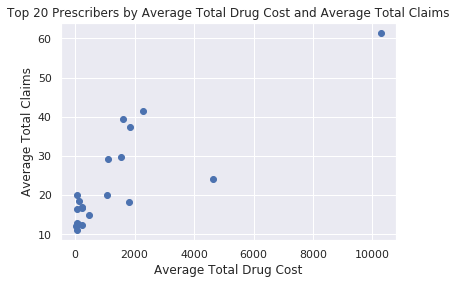

In [22]:

# Extract the top 20 rows from the DataFrame
top_20_rows = partD_agg.limit(20).toPandas()


# Create a scatter plot to visualize the relationship between average total drug cost and average total claims
plt.scatter(x=top_20_rows['avg_tot_drug_cst'], y=top_20_rows['avg_tot_clms'])
plt.xlabel('Average Total Drug Cost')
plt.ylabel('Average Total Claims')
plt.title('Top 20 Prescribers by Average Total Drug Cost and Average Total Claims')
plt.show()

In [23]:
from pyspark.sql.functions import col

partD_allpd = partD_agg.join(partD_catfpd, on='Prscrbr_NPI', how='left')



In [24]:
partD_allpd.show()

+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+------------+-----+-------------+----------+-------------------+
|Prscrbr_NPI|  sum_tot_drug_cst|  avg_tot_drug_cst|max_tot_drug_cst|sum_tot_clms|      avg_tot_clms|max_tot_clms|sum_tot_day_suply| avg_tot_day_suply|max_tot_day_suply|        city|state|    last_name|first_name|         Speciality|
+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+------------+-----+-------------+----------+-------------------+
| 1003043209|          39676.76|1202.3260606060608|         9329.51|        1170| 35.45454545454545|         109|            44482| 1347.939393939394|             5262|        Lynn|   MA|        Affel|  Marjorie|    Family Practice|
| 1003072810|214723.17999999996|2618.5753658536582|        21064.12|

In [25]:
partD_allpd.head()

Row(Prscrbr_NPI='1003043209', sum_tot_drug_cst=39676.76, avg_tot_drug_cst=1202.3260606060608, max_tot_drug_cst=9329.51, sum_tot_clms=1170, avg_tot_clms=35.45454545454545, max_tot_clms=109, sum_tot_day_suply=44482, avg_tot_day_suply=1347.939393939394, max_tot_day_suply=5262, city='Lynn', state='MA', last_name='Affel', first_name='Marjorie', Speciality='Family Practice')

In [26]:
gcs_client = storage.Client()
bucket = gcs_client.bucket('shreneel-bigdata1')

list(bucket.list_blobs(prefix='OP_DTL_GNRL_PGYR2015_P01202023.csv'))
!hdfs dfs -ls 'gs://shreneel-bigdata1/OP_DTL_GNRL_PGYR2015_P01202023.csv'
payment_rawdata = spark \
  .read \
  .option ( "inferSchema" , "true" ) \
  .option ( "header" , "true" ) \
  .csv ( "gs://shreneel-bigdata1/OP_DTL_GNRL_PGYR2015_P01202023.csv" )

payment_rawdata.printSchema()

-rwx------   3 root root 6409783272 2023-05-04 01:50 gs://shreneel-bigdata1/OP_DTL_GNRL_PGYR2015_P01202023.csv
root
 |-- Change_Type: string (nullable = true)
 |-- Covered_Recipient_Type: string (nullable = true)
 |-- Teaching_Hospital_CCN: integer (nullable = true)
 |-- Teaching_Hospital_ID: integer (nullable = true)
 |-- Teaching_Hospital_Name: string (nullable = true)
 |-- Physician_Profile_ID: integer (nullable = true)
 |-- Physician_NPI: integer (nullable = true)
 |-- Physician_First_Name: string (nullable = true)
 |-- Physician_Middle_Name: string (nullable = true)
 |-- Physician_Last_Name: string (nullable = true)
 |-- Physician_Name_Suffix: string (nullable = true)
 |-- Recipient_Primary_Business_Street_Address_Line1: string (nullable = true)
 |-- Recipient_Primary_Business_Street_Address_Line2: string (nullable = true)
 |-- Recipient_City: string (nullable = true)
 |-- Recipient_State: string (nullable = true)
 |-- Recipient_Zip_Code: string (nullable = true)
 |-- Recipient_Co

In [27]:
from pyspark.sql.functions import col

payment_fpd = payment_rawdata.select(col('Physician_First_Name'),
                                 col('Physician_Last_Name'),
                                 col('Recipient_City'),
                                 col('Recipient_State'),
                                 col('Total_Amount_of_Payment_USDollars'))


In [28]:
payment_fpd.head()

Row(Physician_First_Name='DAVID', Physician_Last_Name='GORDLEY', Recipient_City='SLIPPERY ROCK', Recipient_State='PA', Total_Amount_of_Payment_USDollars='60.00')

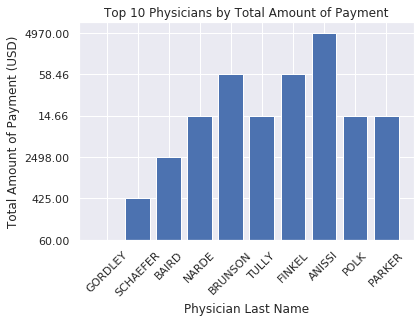

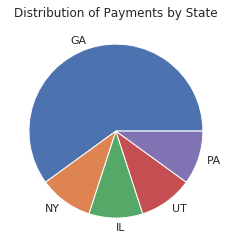

In [29]:


import matplotlib.pyplot as plt

# Extract the top 10 rows from the DataFrame
top_10_rows = payment_fpd.limit(10).toPandas()

# Create a bar chart to visualize the total amount of payment for each physician
plt.bar(x=top_10_rows['Physician_Last_Name'], height=top_10_rows['Total_Amount_of_Payment_USDollars'])
plt.xlabel('Physician Last Name')
plt.ylabel('Total Amount of Payment (USD)')
plt.title('Top 10 Physicians by Total Amount of Payment')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

# Create a pie chart to visualize the distribution of payments by state
state_counts = top_10_rows['Recipient_State'].value_counts()
plt.pie(x=state_counts.values, labels=state_counts.index)
plt.title('Distribution of Payments by State')
plt.show()


In [30]:
payment_fpd.count()

11572091

In [31]:
from pyspark.sql.functions import sum

payment_fpd1 = payment_fpd.groupby(['Physician_First_Name', 'Physician_Last_Name', 'Recipient_City', 'Recipient_State']) \
                         .agg(sum('Total_Amount_of_Payment_USDollars').alias('Total_Amount_of_Payment_USDollars_sum'))

In [32]:
payment_fpd1.show()

+--------------------+-------------------+--------------+---------------+-------------------------------------+
|Physician_First_Name|Physician_Last_Name|Recipient_City|Recipient_State|Total_Amount_of_Payment_USDollars_sum|
+--------------------+-------------------+--------------+---------------+-------------------------------------+
|               HARRY|               TAMM|       PHOENIX|             AZ|                    2793.359999999999|
|              DANIEL|               ROTH|    FORT WAYNE|             IN|                             49565.61|
|              DONALD|            SLAPPEY|    BIRMINGHAM|             AL|                    97.47000000000001|
|             SHAHEEN|            JAWAHAR|         TRACY|             CA|                    654.0300000000001|
|         CHRISTOPHER|           VENDRYES|         MIAMI|             FL|                              3468.51|
|                JOHN|      SATTERTHWAITE|    GREENVILLE|             SC|                               

In [33]:
from pyspark.sql.functions import col

rename_dict = {'Physician_First_Name':'first_name', 'Physician_Last_Name':'last_name', 'Recipient_City':'city', 'Recipient_State':'state', 'Total_Amount_of_Payment_USDollars_sum':'Total_Payment_Sum'}

payment_fpd1 = payment_fpd1.select([col(c).alias(rename_dict.get(c, c)) for c in payment_fpd1.columns])


In [34]:
payment_fpd1.show()

+----------+----------+----------------+-----+------------------+
|first_name| last_name|            city|state| Total_Payment_Sum|
+----------+----------+----------------+-----+------------------+
|JACQUELINE| GUERRIERO|    WILKES BARRE|   PA|             17.41|
|   BRADLEY|  BENGTSON|    GRAND RAPIDS|   MI|118854.28000000003|
|    WALTER|     BORIS|    BROWNS MILLS|   NJ|375.45000000000005|
|     PETER|   PANTERA|      FORT MYERS|   FL| 550.0300000000001|
|      PAUL|     SCOTT|          TACOMA|   WA|            142.92|
|     Karin|     Quick|     Minneapolis|   MN|             11.29|
|   CHARLES|   FLOWERS|        COLUMBIA|   SC|1500.6100000000001|
|      MARK|    NADLER|        DANVILLE|   CA|             326.4|
|     HEATH| BROUSSARD|         JACKSON|   TN| 53771.90999999999|
|    STEVEN|      PARK|      CINCINNATI|   OH|            424.86|
|     KEITH|      BUHL|    PHILADELPHIA|   PA|             761.6|
|   ANTHONY|      ROSA|    PHILADELPHIA|   PA|             72.05|
|    Steve

In [35]:
from pyspark.sql.functions import desc

payment_fpd2 = payment_fpd1.sort(desc('Total_Payment_Sum'))

In [36]:
payment_fpd2.show()

+----------+---------+-----------------+-----+--------------------+
|first_name|last_name|             city|state|   Total_Payment_Sum|
+----------+---------+-----------------+-----+--------------------+
|      null|     null|           DUARTE|   CA|      3.0654182569E8|
|      null|     null|           BOSTON|   MA|       4.200212036E7|
|     ROGER|  JACKSON|NORTH KANSAS CITY|   MO|       3.450708545E7|
|      null|     null|           Boston|   MA|       2.076668303E7|
|   STEPHEN| BURKHART|      SAN ANTONIO|   TX|1.9421951320000004E7|
|      null|     null|        Rochester|   NY|        1.93059828E7|
|     KEVIN|    FOLEY|          Memphis|   TN| 1.782763144999999E7|
|      null|     null|        Cleveland|   OH|1.4486272639999999E7|
|      YVES|    GOBIN|         New York|   NY|1.2962521479999999E7|
|      null|     null|            PHILA|   PA|       1.157290884E7|
|    RODNEY|    RAABE|          Spokane|   WA|1.0414841879999999E7|
|      null|     null|      Little Rock|   AR|1.

In [37]:
pay_partD_fpd = partD_allpd.join(payment_fpd2, ['last_name', 'first_name', 'city', 'state'], how='left')


In [38]:
pay_partD_fpd.show()

+---------+----------+----------------+-----+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+--------------------+------------------+
|last_name|first_name|            city|state|Prscrbr_NPI|  sum_tot_drug_cst|  avg_tot_drug_cst|max_tot_drug_cst|sum_tot_clms|      avg_tot_clms|max_tot_clms|sum_tot_day_suply| avg_tot_day_suply|max_tot_day_suply|          Speciality| Total_Payment_Sum|
+---------+----------+----------------+-----+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+--------------------+------------------+
|   Abbott|     Laura|   San Francisco|   CA| 1093071367|          16670.63| 5556.876666666667|         9978.51|          65|21.666666666666668|          35|             6923|2307.6666666666665|             5003|Student in an Org...|        

In [39]:
gcs_client = storage.Client()
bucket = gcs_client.bucket('shreneel-bigdata1')

list(bucket.list_blobs(prefix='UPDATED.csv'))
!hdfs dfs -ls 'gs://shreneel-bigdata1/UPDATED.csv'
IELE_rawdata = spark \
  .read \
  .option ( "inferSchema" , "true" ) \
  .option ( "header" , "true" ) \
  .csv ( "gs://shreneel-bigdata1/UPDATED.csv" )

IELE_rawdata.printSchema()  

-rwx------   3 root root   13969086 2023-05-04 01:25 gs://shreneel-bigdata1/UPDATED.csv
root
 |-- LASTNAME: string (nullable = true)
 |-- FIRSTNAME: string (nullable = true)
 |-- MIDNAME: string (nullable = true)
 |-- BUSNAME: string (nullable = true)
 |-- GENERAL: string (nullable = true)
 |-- SPECIALTY: string (nullable = true)
 |-- UPIN: string (nullable = true)
 |-- NPI: integer (nullable = true)
 |-- DOB: integer (nullable = true)
 |-- ADDRESS: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- ZIP: string (nullable = true)
 |-- EXCLTYPE: string (nullable = true)
 |-- EXCLDATE: string (nullable = true)
 |-- REINDATE: integer (nullable = true)
 |-- WAIVERDATE: integer (nullable = true)
 |-- WVRSTATE: string (nullable = true)



In [40]:
npifraud_pd0 = IELE_rawdata.select('NPI', 'EXCLTYPE')
npifraud_pd0.show()

+----------+--------+
|       NPI|EXCLTYPE|
+----------+--------+
|         0|  1128a1|
|1972902351|  1128b8|
|         0|  1128a1|
|         0|  1128b7|
|1922348218|  1128a1|
|         0|  1128b5|
|         0|  1128a1|
|         0|  1128b8|
|         0|  1128a1|
|         0|  1128b8|
|         0|  1128b5|
|         0|  1128a1|
|         0|  1128b8|
|         0|  1128a1|
|         0|  1128a1|
|         0|  1128b4|
|         0|  1128a1|
|         0|  1128b8|
|         0|  1128a1|
|         0|  1128a1|
+----------+--------+
only showing top 20 rows



In [41]:
from pyspark.sql.functions import col


npifraud_pd1 = npifraud_pd0.filter(col('NPI') != 0)


In [42]:
npifraud_pd1.show()

+----------+---------+
|       NPI| EXCLTYPE|
+----------+---------+
|1972902351|   1128b8|
|1922348218|   1128a1|
|1942476080|   1128b8|
|1275600959|   1128a1|
|1891731758|   1128b8|
|1265830335|   1128a1|
|1851631543|   1128b7|
|1902198435|   1128a1|
|1073916631|   1128b7|
|1073682936|1128b7   |
|1902166028|   1128b8|
|1992906937|   1128b8|
|1104947944|   1128a1|
|1164669479|   1128a1|
|1043302250|   1128a1|
|1801231436|1128a1   |
|1912011800|   1128b8|
|1780812768|   1128b7|
|1447560867|   1128b8|
|1790963460|   1128b7|
+----------+---------+
only showing top 20 rows



In [43]:
rename_dict = {'NPI':'Prscrbr_NPI', 'EXCLTYPE':'is_fraud'}

npi_fraud_pd = npifraud_pd1.select([col(c).alias(rename_dict.get(c, c)) for c in npifraud_pd1.columns])


In [44]:
#pip install graphframes

In [45]:
npi_fraud_pd.show()

+-----------+---------+
|Prscrbr_NPI| is_fraud|
+-----------+---------+
| 1972902351|   1128b8|
| 1922348218|   1128a1|
| 1942476080|   1128b8|
| 1275600959|   1128a1|
| 1891731758|   1128b8|
| 1265830335|   1128a1|
| 1851631543|   1128b7|
| 1902198435|   1128a1|
| 1073916631|   1128b7|
| 1073682936|1128b7   |
| 1902166028|   1128b8|
| 1992906937|   1128b8|
| 1104947944|   1128a1|
| 1164669479|   1128a1|
| 1043302250|   1128a1|
| 1801231436|1128a1   |
| 1912011800|   1128b8|
| 1780812768|   1128b7|
| 1447560867|   1128b8|
| 1790963460|   1128b7|
+-----------+---------+
only showing top 20 rows



In [46]:
from pyspark.sql.functions import lit

npi_fraud_pd = npi_fraud_pd.withColumn('is_fraud', lit(1))


In [47]:
npi_fraud_pd.show()

+-----------+--------+
|Prscrbr_NPI|is_fraud|
+-----------+--------+
| 1972902351|       1|
| 1922348218|       1|
| 1942476080|       1|
| 1275600959|       1|
| 1891731758|       1|
| 1265830335|       1|
| 1851631543|       1|
| 1902198435|       1|
| 1073916631|       1|
| 1073682936|       1|
| 1902166028|       1|
| 1992906937|       1|
| 1104947944|       1|
| 1164669479|       1|
| 1043302250|       1|
| 1801231436|       1|
| 1912011800|       1|
| 1780812768|       1|
| 1447560867|       1|
| 1790963460|       1|
+-----------+--------+
only showing top 20 rows



In [48]:
print(npi_fraud_pd.dtypes)


[('Prscrbr_NPI', 'int'), ('is_fraud', 'int')]


In [49]:
Features_pd1 = pay_partD_fpd.join(npi_fraud_pd, ['Prscrbr_NPI'], how='left')
Features_pd1.show()

+-----------+---------+----------+----------------+-----+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+--------------------+------------------+--------+
|Prscrbr_NPI|last_name|first_name|            city|state|  sum_tot_drug_cst|  avg_tot_drug_cst|max_tot_drug_cst|sum_tot_clms|      avg_tot_clms|max_tot_clms|sum_tot_day_suply| avg_tot_day_suply|max_tot_day_suply|          Speciality| Total_Payment_Sum|is_fraud|
+-----------+---------+----------+----------------+-----+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+--------------------+------------------+--------+
| 1093071367|   Abbott|     Laura|   San Francisco|   CA|          16670.63| 5556.876666666667|         9978.51|          65|21.666666666666668|          35|             6923|2307.6666666666665|             5003|St

In [50]:
Features_pd1.describe().show()

+-------+-------------------+-----------+----------+------+------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+----------------+-----------------+--------+
|summary|        Prscrbr_NPI|  last_name|first_name|  city| state|  sum_tot_drug_cst|  avg_tot_drug_cst|  max_tot_drug_cst|      sum_tot_clms|      avg_tot_clms|     max_tot_clms| sum_tot_day_suply| avg_tot_day_suply| max_tot_day_suply|      Speciality|Total_Payment_Sum|is_fraud|
+-------+-------------------+-----------+----------+------+------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+----------------+-----------------+--------+
|  count|             893173|     893173|    893165|893173|893173|            893173|            893173|            893173|            893173|            893

In [51]:
Features_pd1 = Features_pd1.fillna(0)

In [52]:
Features_pd1

DataFrame[Prscrbr_NPI: string, last_name: string, first_name: string, city: string, state: string, sum_tot_drug_cst: double, avg_tot_drug_cst: double, max_tot_drug_cst: double, sum_tot_clms: bigint, avg_tot_clms: double, max_tot_clms: int, sum_tot_day_suply: bigint, avg_tot_day_suply: double, max_tot_day_suply: int, Speciality: string, Total_Payment_Sum: double, is_fraud: int]

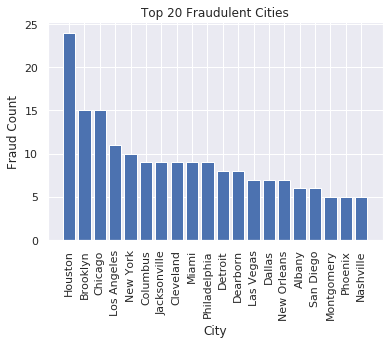

In [53]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Filter the fraud data where is_fraud = 1
fraud_cities = Features_pd1.filter(col("is_fraud") == 1).select("city")

# Count the number of fraud occurrences by city
fraud_counts = fraud_cities.groupBy("city").count().orderBy("count", ascending=False).limit(20)

# Convert the fraud counts to a Pandas dataframe for plotting
fraud_counts_pd = fraud_counts.toPandas()

# Create a bar plot
plt.bar(fraud_counts_pd["city"], fraud_counts_pd["count"])

# Add labels and title
plt.xlabel("City")
plt.ylabel("Fraud Count")
plt.title("Top 20 Fraudulent Cities")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [54]:
from pyspark.sql.functions import col

fraud_count = Features_pd1.filter(col('is_fraud') == 1).count()


In [55]:
fraud_count

1140

In [56]:
FeaturesAll = Features_pd1

In [57]:
from pyspark.sql.functions import log10, col

# Scaling the features
FeaturesAll = FeaturesAll.withColumn('sum_tot_drug_cst', log10(col('sum_tot_drug_cst') + 1.0))
FeaturesAll = FeaturesAll.withColumn('sum_tot_clms', log10(col('sum_tot_clms') + 1.0))
FeaturesAll = FeaturesAll.withColumn('sum_tot_day_suply', log10(col('sum_tot_day_suply') + 1.0))
FeaturesAll = FeaturesAll.withColumn('Total_Payment_Sum', log10(col('Total_Payment_Sum') + 1.0))

FeaturesAll = FeaturesAll.withColumn('avg_tot_drug_cst', log10(col('avg_tot_drug_cst') + 1.0))
FeaturesAll = FeaturesAll.withColumn('avg_tot_clms', log10(col('avg_tot_clms') + 1.0))
FeaturesAll = FeaturesAll.withColumn('avg_tot_day_suply', log10(col('avg_tot_day_suply') + 1.0))

FeaturesAll = FeaturesAll.withColumn('max_tot_drug_cst', log10(col('max_tot_drug_cst') + 1.0))
FeaturesAll = FeaturesAll.withColumn('max_tot_clms', log10(col('max_tot_clms') + 1.0))
FeaturesAll = FeaturesAll.withColumn('max_tot_day_suply', log10(col('max_tot_day_suply') + 1.0))

FeaturesAll = FeaturesAll.withColumn('claim_max-mean', col('max_tot_clms') - col('avg_tot_clms'))
FeaturesAll = FeaturesAll.withColumn('supply_max-mean', col('max_tot_day_suply') - col('avg_tot_day_suply'))
FeaturesAll = FeaturesAll.withColumn('drug_max-mean', col('max_tot_drug_cst') - col('avg_tot_drug_cst'))



In [58]:
FeaturesAll

DataFrame[Prscrbr_NPI: string, last_name: string, first_name: string, city: string, state: string, sum_tot_drug_cst: double, avg_tot_drug_cst: double, max_tot_drug_cst: double, sum_tot_clms: double, avg_tot_clms: double, max_tot_clms: double, sum_tot_day_suply: double, avg_tot_day_suply: double, max_tot_day_suply: double, Speciality: string, Total_Payment_Sum: double, is_fraud: int, claim_max-mean: double, supply_max-mean: double, drug_max-mean: double]

In [59]:
from pyspark.sql.functions import col

FeaturesAll = FeaturesAll.withColumn("Prscrbr_NPI", col("Prscrbr_NPI").cast("string"))


In [60]:
from pyspark.sql.types import StringType

categorical_features = ['Prscrbr_NPI', 'last_name', 'Speciality', 'first_name', 'city', 'state']

for feature in categorical_features:
    FeaturesAll = FeaturesAll.withColumn(feature, FeaturesAll[feature].cast(StringType()))


In [61]:
numerical_features = ['sum_tot_drug_cst', 'avg_tot_drug_cst','Total_Payment_Sum',
       'max_tot_drug_cst', 'sum_tot_clms',
       'avg_tot_clms', 'max_tot_clms',
       'sum_tot_day_suply', 'avg_tot_day_suply', 'max_tot_day_suply',
    'claim_max-mean','supply_max-mean', 'drug_max-mean']

In [62]:
target = ['is_fraud']


In [63]:
allvars = categorical_features + numerical_features + target


In [64]:
y = FeaturesAll.select("is_fraud").rdd.flatMap(lambda x: x).collect()
X = FeaturesAll.select([col(c) for c in allvars if c != 'is_fraud'])


In [65]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.tuning import TrainValidationSplit

# select the numerical columns from the original dataframe
numerical_features = ['sum_tot_drug_cst', 'avg_tot_drug_cst','Total_Payment_Sum',
       'max_tot_drug_cst', 'sum_tot_clms',
       'avg_tot_clms', 'max_tot_clms',
       'sum_tot_day_suply', 'avg_tot_day_suply', 'max_tot_day_suply',
    'claim_max-mean','supply_max-mean', 'drug_max-mean']
X = FeaturesAll.select(numerical_features)

# convert numerical columns to double type
for feature in numerical_features:
    X = X.withColumn(feature, col(feature).cast(DoubleType()))

# combine features into a single vector column
vectorAssembler = VectorAssembler(inputCols=X.columns, outputCol="features_vec")
X = vectorAssembler.transform(X)

# split the data into train and validation sets
train, test = X.randomSplit([0.8, 0.2], seed=0)

# select the correct columns for input and output
X_train = train.select(X.columns)
X_valid = test.select(X.columns)
y_train = train.select("Total_Payment_Sum")
y_valid = test.select("Total_Payment_Sum")

print(X_train.count(), len(X_train.columns))
print(X_valid.count(), len(X_valid.columns))


714253 14
178920 14


In [66]:
from pyspark.sql.functions import col

# fill null values in numerical columns with 0
for feature in numerical_features:
    X_train = X_train.withColumn(feature, col(feature).cast("double"))
    X_valid = X_valid.withColumn(feature, col(feature).cast("double"))
    X_train = X_train.na.fill(0, [feature])
    X_valid = X_valid.na.fill(0, [feature])

# fill null values in categorical columns with 'NA'
for feature in categorical_features:
    if feature in X_train.columns:
        X_train = X_train.na.fill('NA', [feature])
    if feature in X_valid.columns:
        X_valid = X_valid.na.fill('NA', [feature])



In [67]:
from pyspark.sql.functions import col

X_train.select([col(col_name).cast("double").alias(col_name) for col_name in numerical_features]).dtypes



[('sum_tot_drug_cst', 'double'),
 ('avg_tot_drug_cst', 'double'),
 ('Total_Payment_Sum', 'double'),
 ('max_tot_drug_cst', 'double'),
 ('sum_tot_clms', 'double'),
 ('avg_tot_clms', 'double'),
 ('max_tot_clms', 'double'),
 ('sum_tot_day_suply', 'double'),
 ('avg_tot_day_suply', 'double'),
 ('max_tot_day_suply', 'double'),
 ('claim_max-mean', 'double'),
 ('supply_max-mean', 'double'),
 ('drug_max-mean', 'double')]

In [68]:
from pyspark.sql.functions import rand

df_len = FeaturesAll.count()
train_len = int(df_len * 0.8)

df_train = FeaturesAll.orderBy(rand()).limit(train_len)
df_valid = FeaturesAll.orderBy(rand()).exceptAll(df_train)

print(df_train.count())
print(df_valid.count())


714538
178635


In [69]:
df_train.printSchema()


root
 |-- Prscrbr_NPI: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sum_tot_drug_cst: double (nullable = true)
 |-- avg_tot_drug_cst: double (nullable = true)
 |-- max_tot_drug_cst: double (nullable = true)
 |-- sum_tot_clms: double (nullable = true)
 |-- avg_tot_clms: double (nullable = true)
 |-- max_tot_clms: double (nullable = true)
 |-- sum_tot_day_suply: double (nullable = true)
 |-- avg_tot_day_suply: double (nullable = true)
 |-- max_tot_day_suply: double (nullable = true)
 |-- Speciality: string (nullable = true)
 |-- Total_Payment_Sum: double (nullable = true)
 |-- is_fraud: integer (nullable = true)
 |-- claim_max-mean: double (nullable = true)
 |-- supply_max-mean: double (nullable = true)
 |-- drug_max-mean: double (nullable = true)



In [70]:
from pyspark.sql.functions import col

partD_drug_train = partD_Drug_df.join(df_train.select('Prscrbr_NPI', 'is_fraud'), on=['Prscrbr_NPI'], how='inner')
partD_drug_all = partD_Drug_df.join(FeaturesAll.select('Prscrbr_NPI', 'is_fraud'), on=['Prscrbr_NPI'], how='inner')


In [71]:
print(partD_drug_train.filter(col("is_fraud") == 1).count())


46754


In [72]:
# Total records in train set
print("Total records in train set : ")
print(partD_drug_train.count())

# Total Fraud in train set
print("Total Fraud in train set : ")
print(partD_drug_train.filter("is_fraud == 1").count())

# Show DataFrame
partD_drug_train.show()

Total records in train set : 
19949515
Total Fraud in train set : 
46706
+-----------+--------------------+------------+--------+-------------+---------------+--------+
|Prscrbr_NPI|           Brnd_Name|Tot_Drug_Cst|Tot_Clms|Tot_Day_Suply|   Prscrbr_Type|is_fraud|
+-----------+--------------------+------------+--------+-------------+---------------+--------+
| 1003017906|Acetaminophen-Cod...|      415.07|      12|          280|Family Practice|       0|
| 1003017906|           Acyclovir|      795.45|      39|         1159|Family Practice|       0|
| 1003017906|  Alendronate Sodium|      175.21|      15|          868|Family Practice|       0|
| 1003017906|         Allopurinol|      683.83|      51|         2607|Family Practice|       0|
| 1003017906|          Alprazolam|      305.93|      30|          790|Family Practice|       0|
| 1003017906|      Amiodarone Hcl|       45.69|      12|          360|Family Practice|       0|
| 1003017906|   Amitriptyline Hcl|       195.5|      20|       

In [73]:
partD_drug_train_20= partD_drug_train.sample(fraction=0.05, seed=42)

In [74]:
feature_cols = ['Tot_Drug_Cst', 'Tot_Clms', 'Tot_Day_Suply']

# Create a vector assembler to assemble the features into a vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Apply the vector assembler to the training data
train_data = assembler.transform(partD_drug_train_20).select("features", "is_fraud")

# Split the data into training and test sets
train_set, test_set = train_data.randomSplit([0.7, 0.3], seed=12345)

In [75]:
num_train_data = train_set.count()
print("Number of data in train_set:", num_train_data)


Number of data in train_set: 697534


In [76]:
################################################

In [77]:
 import time


In [80]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator,BinaryClassificationEvaluator

# Create a logistic regression model with default parameters
lr = LogisticRegression(featuresCol='features', labelCol='is_fraud')

# Train the model using the training set
start = time.time()
lr_model = lr.fit(train_set)
end = time.time()
print(f"Time to train logistic regression model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = lr_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud')
accuracy = binary_evaluator.evaluate(predictions)

# Evaluate the model using F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Time to train logistic regression model: 220.3205 seconds
Time to make predictions on test set: 0.0326 seconds
Accuracy: 0.5937
F1 Score: 0.9965


In [81]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Create a Naive Bayes model with default parameters
nb = NaiveBayes(featuresCol='features', labelCol='is_fraud')

# Train the model using the training set
start = time.time()
nb_model = nb.fit(train_set)
end = time.time()
print(f"Time to train Naive Bayes model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = nb_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud')
accuracy = binary_evaluator.evaluate(predictions)

# Evaluate the model using F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Time to train Naive Bayes model: 161.3878 seconds
Time to make predictions on test set: 0.0361 seconds
Accuracy: 0.4770
F1 Score: 0.8752


In [82]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Create a GBTClassifier model with default parameters
gbt = GBTClassifier(featuresCol='features', labelCol='is_fraud')

# Train the model using the training set
start = time.time()
gbt_model = gbt.fit(train_set)
end = time.time()
print(f"Time to train GBTClassifier model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = gbt_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud')
accuracy = binary_evaluator.evaluate(predictions)

# Evaluate the model using F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Time to train GBTClassifier model: 285.3160 seconds
Time to make predictions on test set: 0.0272 seconds
Accuracy: 0.6036
F1 Score: 0.9964


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Create a RandomForestClassifier model with default parameters
rf = RandomForestClassifier(featuresCol='features', labelCol='is_fraud')

# Train the model using the training set
start = time.time()
rf_model = rf.fit(train_set)
end = time.time()
print(f"Time to train RandomForestClassifier model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = rf_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud')
accuracy = binary_evaluator.evaluate(predictions)

# Evaluate the model using F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Time to train RandomForestClassifier model: 324.4908 seconds
Time to make predictions on test set: 0.0276 seconds
Accuracy: 0.5000
F1 Score: 0.9966


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier


# Split the data into training and test sets
start = time.time()
train_set, test_set = train_data.randomSplit([0.7, 0.3], seed=12345)
end = time.time()
print(f"Time to split data into training and test sets: {end - start:.4f} seconds")

# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier(
    featuresCol='features', 
    labelCol='is_fraud',
    maxDepth=5,
    maxBins=32,
    minInstancesPerNode=1,
    impurity='gini'
)

# Train the model using the training set
start = time.time()
dt_model = dt.fit(train_set)
end = time.time()
print(f"Time to train DecisionTreeClassifier model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = dt_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics
evaluator = BinaryClassificationEvaluator(labelCol='is_fraud')
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy:.4f}")

Time to split data into training and test sets: 0.0152 seconds
Time to train DecisionTreeClassifier model: 174.7545 seconds
Time to make predictions on test set: 0.0292 seconds


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Define the x-axis points
x = ['2 Nodes', '4 Nodes']

# Define the y-axis values for each bar
logistic_regression = [0.9965, 0.9964]
naive_bayes = [0.8734, 0.8725]
gbt_classifier = [0.9965, 0.9965]
random_forest = [0.9966, 0.9965]

# Set the width of each bar
bar_width = 0.2

# Create an array to position the bars on the x-axis
bar_positions = np.arange(len(x))

# Create the bar plots for each line
plt.bar(bar_positions - 1.5*bar_width, logistic_regression, width=bar_width, label='Logistic Regression')
plt.bar(bar_positions - 0.5*bar_width, naive_bayes, width=bar_width, label='Naive Bayes')
plt.bar(bar_positions + 0.5*bar_width, gbt_classifier, width=bar_width, label='GBT Classifier')
plt.bar(bar_positions + 1.5*bar_width, random_forest, width=bar_width, label='Random Forest')

# Add labels and title to the graph
plt.xlabel('Number of Nodes')
plt.ylabel('F1 Score')
plt.title('Scaling effect on F1 Score')

# Add tick labels to the x-axis
plt.xticks(bar_positions, x)

# Add a legend to the graph
plt.legend()

# Display the graph
plt.show()

In [ ]:
# Define the x-axis points
x = ['2 Nodes', '4 Nodes']

# Define the y-axis values for each line
logistic_regression = [0.5835, 0.5947]
naive_bayes = [0.5119, 0.4789]
gbt_classifier = [0.6005, 0.6282]
random_forest = [0.5500, 0.5000]

# Plot the lines on the graph with markers for each data point
plt.plot(x, logistic_regression, marker='o', label='Logistic Regression')
plt.plot(x, naive_bayes, marker='s', label='Naive Bayes')
plt.plot(x, gbt_classifier, marker='^', label='GBT Classifier')
plt.plot(x, random_forest, marker='d', label='Random Forest')

# Add labels and title to the graph
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Scaling Effect on Accuracy')

# Add a legend to the graph
plt.legend()

# Display the graph
plt.show()

In [ ]:
# Define the x-axis points
x = ['2 Nodes', '4 Nodes']

# Define the y-axis values for each line
logistic_regression = [220.5698, 185.1697]
naive_bayes = [264.6157, 216.4411]
gbt_classifier = [273.0909, 236.7622]
random_model = [324.4908, 300.7622]

# Plot the lines on the graph with markers for each data point
plt.plot(x, logistic_regression, marker='o', label='Logistic Regression')
plt.plot(x, naive_bayes, marker='s', label='Naive Bayes')
plt.plot(x, gbt_classifier, marker='^', label='GBT Classifier')
plt.plot(x, random_model, marker='d', label='Random Model')

# Add labels and title to the graph
plt.xlabel('Number of Nodes')
plt.ylabel('Time (seconds)')
plt.title('Time effect of Scaling on Classification Models')

# Add a legend to the graph
plt.legend()

# Display the graph
plt.show()